## 1. Import Packages

In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])


In [3]:
# from config.py, TRAIN_START_DATE is a string
TRAIN_START_DATE
# from config.py, TRAIN_END_DATE is a string
TRAIN_END_DATE

'2020-07-31'

## 2. GET data

In [4]:
TRAIN_START_DATE = '2009-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2021-10-31'


In [5]:
df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = config_tickers.NAS_100_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
finished AMGN
[*********************100%***********************]  1 of 1 completed

/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)



finished AAPL
[*********************100%***********************]  1 of 1 completed
finished AMAT


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INTC


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PCAR


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PAYX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MSFT


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADBE


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CSCO


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SGEN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished QCOM


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished COST


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SBUX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FISV


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CTXS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INTU


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AMZN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished EBAY


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BIIB


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CHKP


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished GILD


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NLOK


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CMCSA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FAST


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADSK


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CTSH


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NVDA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished GOOGL


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ISRG


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VRTX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished HSIC


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BIDU


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ATVI


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADP


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ROST


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ORLY


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FTNT


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BKNG


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KDP


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MU


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished DLTR


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LCID


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SIRI


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MNST


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AVGO


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TXN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MDLZ


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished META


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ADI


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WDC


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished REGN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LBTYK


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VRSK


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NFLX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TSLA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CHTR


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MAR


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ILMN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LRCX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished EA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AAL
[*********************100%***********************]  1 of 1 completed
finished WBA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KHC


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished BMRN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished JD


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SWKS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished INCY


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PYPL


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CDW


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished FOXA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PDD


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TMUS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished EXPE


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TCOM


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ULTA


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CSX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NTES


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MCHP


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CTAS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished KLAC


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished HAS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished JBHT


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished IDXX


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WYNN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished MELI


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ALGN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished CDNS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished WDAY


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SNPS


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished ASML


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished TTWO


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished PEP


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NXPI


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished XEL


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished AMD


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished NTAP


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished VRSN


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished LULU


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished SPLK


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


[*********************100%***********************]  1 of 1 completed
finished UAL


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Shape of DataFrame:  (305102, 8)


In [6]:
print(config_tickers.NAS_100_TICKER)

['AMGN', 'AAPL', 'AMAT', 'INTC', 'PCAR', 'PAYX', 'MSFT', 'ADBE', 'CSCO', 'SGEN', 'QCOM', 'COST', 'SBUX', 'FISV', 'CTXS', 'INTU', 'AMZN', 'EBAY', 'BIIB', 'CHKP', 'GILD', 'NLOK', 'CMCSA', 'FAST', 'ADSK', 'CTSH', 'NVDA', 'GOOGL', 'ISRG', 'VRTX', 'HSIC', 'BIDU', 'ATVI', 'ADP', 'ROST', 'ORLY', 'FTNT', 'BKNG', 'KDP', 'MU', 'DLTR', 'LCID', 'SIRI', 'MNST', 'AVGO', 'TXN', 'MDLZ', 'META', 'ADI', 'WDC', 'REGN', 'LBTYK', 'VRSK', 'NFLX', 'TSLA', 'CHTR', 'MAR', 'ILMN', 'LRCX', 'EA', 'AAL', 'WBA', 'KHC', 'BMRN', 'JD', 'SWKS', 'INCY', 'PYPL', 'CDW', 'FOXA', 'PDD', 'TMUS', 'EXPE', 'TCOM', 'ULTA', 'CSX', 'NTES', 'MCHP', 'CTAS', 'KLAC', 'HAS', 'JBHT', 'IDXX', 'WYNN', 'MELI', 'ALGN', 'CDNS', 'WDAY', 'SNPS', 'ASML', 'TTWO', 'PEP', 'NXPI', 'XEL', 'AMD', 'NTAP', 'VRSN', 'LULU', 'SPLK', 'UAL']


In [7]:
df.shape

(305102, 8)

In [8]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,7.730000,8.480000,7.670000,7.909601,5167000,AAL,4
1,2009-01-02,3.067143,3.251429,3.041429,2.767330,746015200,AAPL,4
2,2009-01-02,21.110001,23.100000,21.070000,23.020000,6670700,ADBE,4
3,2009-01-02,19.000000,19.780001,18.760000,13.920574,3264900,ADI,4
4,2009-01-02,34.784901,35.548725,34.205444,25.174133,4021809,ADP,4


In [9]:
print(len(df.tic.unique()))

100


## 3. Preprocess Data

In [10]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=True,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicator_df = indicator_df.append(
/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/preprocessors.py:158: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  indicato

Successfully added technical indicators
[*********************100%***********************]  1 of 1 completed
finished ^VIX
Shape of DataFrame:  (3229, 8)
Successfully added vix


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)


Successfully added turbulence index


In [11]:
print(len(processed["tic"].unique()))

100


In [12]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [13]:
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2009-01-02,AAL,7.730000,8.480000,7.670000,7.909601,5167000.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,7.909601,7.909601,39.189999,0.0
1,2009-01-02,AAPL,3.067143,3.251429,3.041429,2.767330,746015200.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,2.767330,2.767330,39.189999,0.0
2,2009-01-02,ADBE,21.110001,23.100000,21.070000,23.020000,6670700.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,23.020000,23.020000,39.189999,0.0
3,2009-01-02,ADI,19.000000,19.780001,18.760000,13.920574,3264900.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,13.920574,13.920574,39.189999,0.0
4,2009-01-02,ADP,34.784901,35.548725,34.205444,25.174133,4021809.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,25.174133,25.174133,39.189999,0.0
5,2009-01-02,ADSK,19.549999,20.760000,19.549999,20.680000,2845600.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,20.680000,20.680000,39.189999,0.0
6,2009-01-02,ALGN,8.520000,9.060000,8.520000,8.890000,538900.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,8.890000,8.890000,39.189999,0.0
7,2009-01-02,AMAT,10.120000,10.720000,10.010000,8.303118,10074600.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,8.303118,8.303118,39.189999,0.0
8,2009-01-02,AMD,2.190000,2.430000,2.170000,2.380000,13832100.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,2.380000,2.380000,39.189999,0.0
9,2009-01-02,AMGN,58.590000,59.080002,57.750000,44.523758,6547900.0,4.0,0.0,7.961314,7.801324,0.0,66.666667,100.0,44.523758,44.523758,39.189999,0.0


## 4. Build A Market Environment in OpenAI Gym-style

In [14]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

289300
33600


In [15]:
train.tail()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
2892,2020-06-30,WBA,42.119999,42.580002,41.759998,38.577274,4782100.0,1.0,-0.082999,42.108878,36.058569,48.830181,-14.542137,1.500723,38.675563,38.477853,30.43,115.917386
2892,2020-06-30,WDAY,186.179993,188.690002,185.020004,187.360001,1929100.0,1.0,5.163632,190.785409,172.961589,57.951937,96.267627,14.442128,178.263666,163.655833,30.43,115.917386
2892,2020-06-30,WDC,43.220001,44.310001,42.820000,44.150002,6924800.0,1.0,-0.295696,48.804006,39.911994,49.805174,-15.706761,6.421213,44.104666,43.083167,30.43,115.917386
2892,2020-06-30,WYNN,73.570000,74.860001,72.120003,74.489998,4590400.0,1.0,-3.358382,109.820764,66.555236,45.028611,-128.071085,26.381041,86.764000,81.579667,30.43,115.917386
2892,2020-06-30,XEL,62.660000,63.169998,62.250000,58.787342,4116800.0,1.0,-0.018074,62.933629,58.016337,49.015898,-40.847104,7.978643,59.755552,59.169271,30.43,115.917386


In [16]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,AAL,13.480000,14.290000,12.630000,12.810000,116661700.0,2.0,-0.016407,20.135254,11.086746,47.624796,-20.614394,5.717277,14.015333,12.287167,28.620001,216.488637
0,2020-07-01,AAPL,91.279999,91.839996,90.977501,89.779900,110737200.0,2.0,3.010423,92.570735,80.068732,62.807150,107.494096,29.730532,83.817341,77.609739,28.620001,216.488637
0,2020-07-01,ADBE,434.799988,442.049988,433.619995,439.809998,2581700.0,2.0,15.322330,453.002175,379.367829,62.646184,120.383181,29.868037,405.434336,376.088668,28.620001,216.488637
0,2020-07-01,ADI,122.290001,122.419998,120.300003,115.601295,1587300.0,2.0,1.908520,120.817465,111.683555,54.658372,44.593547,20.817781,113.869423,106.687574,28.620001,216.488637
0,2020-07-01,ADP,149.220001,150.449997,148.630005,142.569382,1381300.0,2.0,0.791761,152.470034,134.683512,51.721587,27.969733,1.842731,140.816518,137.127408,28.620001,216.488637


In [17]:
INDICATORS

['macd',
 'boll_ub',
 'boll_lb',
 'rsi_30',
 'cci_30',
 'dx_30',
 'close_30_sma',
 'close_60_sma']

In [18]:
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 100, State Space: 1001


In [19]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

## 5. Environment for Training and Train for DRL

In [20]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [21]:
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = False
if_using_ppo = False
if_using_td3 = False
if_using_sac = True


### Agent Training: 5 algorithms (A2C, DDPG, PPO, TD3, SAC)

### Agent 1: A2C


In [ ]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

In [ ]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000) if if_using_ddpg else None

### Agent 3: PPO

In [ ]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

In [ ]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000) if if_using_ppo else None

### Agent 4: TD3

In [ ]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 1000000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

In [ ]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=30000) if if_using_td3 else None

### Agent 5: SAC

In [24]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/sac


In [25]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=40000) if if_using_sac else None

/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (


----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 6         |
|    time_elapsed    | 1709      |
|    total_timesteps | 11572     |
| train/             |           |
|    actor_loss      | 81.1      |
|    critic_loss     | 165       |
|    ent_coef        | 0.0545    |
|    ent_coef_loss   | -481      |
|    learning_rate   | 0.0001    |
|    n_updates       | 11471     |
|    reward          | 26.251299 |
----------------------------------


/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (


day: 2892, episode: 10
begin_total_asset: 1000000.00
end_total_asset: 35264843.68
total_reward: 34264843.68
total_cost: 34957.13
total_trades: 169977
Sharpe: 0.932
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 9        |
|    time_elapsed    | 2396     |
|    total_timesteps | 23144    |
| train/             |          |
|    actor_loss      | -145     |
|    critic_loss     | 154      |
|    ent_coef        | 0.0174   |
|    ent_coef_loss   | -554     |
|    learning_rate   | 0.0001   |
|    n_updates       | 23043    |
|    reward          | 90.76733 |
---------------------------------


/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (


----------------------------------
| time/              |           |
|    episodes        | 12        |
|    fps             | 10        |
|    time_elapsed    | 3170      |
|    total_timesteps | 34716     |
| train/             |           |
|    actor_loss      | -160      |
|    critic_loss     | 434       |
|    ent_coef        | 0.00586   |
|    ent_coef_loss   | -330      |
|    learning_rate   | 0.0001    |
|    n_updates       | 34615     |
|    reward          | 144.39502 |
----------------------------------


/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (
/Users/yangwenkai/project1/FinRL-master/finrl/meta/env_stock_trading/env_stocktrading.py:178: RuntimeWarning: divide by zero encountered in double_scalars
  available_amount = self.state[0] // (


### SAVE trained model

In [26]:
# Save the trained model
path_to_sacmodel_dir="trained_models/trained_sac_100_full/"
trained_sac.save(path_to_sacmodel_dir)

## 6. Trading 

### Set turbulence threshold
Set the turbulence threshold to be greater than the maximum of insample turbulence data. If current turbulence index is greater than the threshold, then we assume that the current market is volatile

In [ ]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [ ]:
insample_risk_indicator.vix.describe()

In [ ]:
insample_risk_indicator.vix.quantile(0.996)

In [ ]:
insample_risk_indicator.turbulence.describe()

In [ ]:
insample_risk_indicator.turbulence.quantile(0.996)

### testing 

In [27]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [28]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
0,2020-07-01,AAL,13.480000,14.290000,12.630000,12.810000,116661700.0,2.0,-0.016407,20.135254,11.086746,47.624796,-20.614394,5.717277,14.015333,12.287167,28.620001,216.488637
0,2020-07-01,AAPL,91.279999,91.839996,90.977501,89.779900,110737200.0,2.0,3.010423,92.570735,80.068732,62.807150,107.494096,29.730532,83.817341,77.609739,28.620001,216.488637
0,2020-07-01,ADBE,434.799988,442.049988,433.619995,439.809998,2581700.0,2.0,15.322330,453.002175,379.367829,62.646184,120.383181,29.868037,405.434336,376.088668,28.620001,216.488637
0,2020-07-01,ADI,122.290001,122.419998,120.300003,115.601295,1587300.0,2.0,1.908520,120.817465,111.683555,54.658372,44.593547,20.817781,113.869423,106.687574,28.620001,216.488637
0,2020-07-01,ADP,149.220001,150.449997,148.630005,142.569382,1381300.0,2.0,0.791761,152.470034,134.683512,51.721587,27.969733,1.842731,140.816518,137.127408,28.620001,216.488637


In [29]:
trained_moedl = trained_sac
df_account_value, df_actions = DRLAgent.DRL_prediction(
    model=trained_moedl, 
    environment = e_trade_gym)

hit end!


In [30]:
df_account_value.shape

(336, 2)

In [31]:
df_account_value.tail()

,date,account_value
331,2021-10-22,1.408525e+06
332,2021-10-25,1.416449e+06
333,2021-10-26,1.419382e+06
334,2021-10-27,1.411869e+06
335,2021-10-28,1.422670e+06


In [32]:
df_actions.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,ALGN,AMAT,AMD,AMGN,...,UAL,ULTA,VRSK,VRSN,VRTX,WBA,WDAY,WDC,WYNN,XEL
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0,0,91,0,77,61,0,0,39,87,...,88,96,96,0,0,89,0,0,0,0
2020-07-02,0,0,0,0,0,0,0,0,0,0,...,0,96,96,0,0,0,0,0,0,0
2020-07-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Backtesting Results

### BackTestStats

In [33]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)
perf_stats_all.to_csv("./"+RESULTS_DIR+"/perf_stats_all_"+now+'.csv')

==============Get Backtest Results===========
Annual return          0.302651
Cumulative returns     0.422670
Annual volatility      0.185075
Sharpe ratio           1.526168
Calmar ratio           2.605989
Stability              0.920151
Max drawdown          -0.116137
Omega ratio            1.284871
Sortino ratio          2.193640
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.091760
Daily value at risk   -0.022196
dtype: float64


/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [34]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
finished ^DJI
Shape of DataFrame:  (335, 8)
Annual return          0.273520
Cumulative returns     0.379084
Annual volatility      0.139248
Sharpe ratio           1.811893
Calmar ratio           3.062662
Stability              0.918651
Max drawdown          -0.089308
Omega ratio            1.351851
Sortino ratio          2.684720
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.051856
Daily value at risk   -0.016542
dtype: float64


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


In [35]:
df_account_value.loc[0,'date']

'2020-07-01'

In [36]:
df_account_value.loc[len(df_account_value)-1,'date']

'2021-10-28'

### BackTestPlot

==============Compare to NDX===========
[*********************100%***********************]  1 of 1 completed
finished ^DJI
Shape of DataFrame:  (335, 8)


/Users/yangwenkai/project1/FinRL-master/finrl/meta/preprocessor/yahoodownloader.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(temp_df)
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2020-07-01
End date,2021-10-28
Total months,16
,Backtest
Annual return,30.3%
Cumulative returns,42.3%
Annual volatility,18.5%
Sharpe ratio,1.53
Calmar ratio,2.61
Stability,0.92
Max drawdown,-11.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.61,2020-09-02,2020-09-23,2020-11-16,54
1,7.79,2021-02-17,2021-03-04,2021-04-05,34
2,7.53,2021-04-16,2021-05-12,2021-06-14,42
3,6.20,2021-01-20,2021-01-29,2021-02-08,14
4,5.37,2021-09-03,2021-10-04,NaT,NaN


/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instea

Stress Events,mean,min,max
New Normal,0.11%,-4.41%,3.46%


/Users/yangwenkai/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


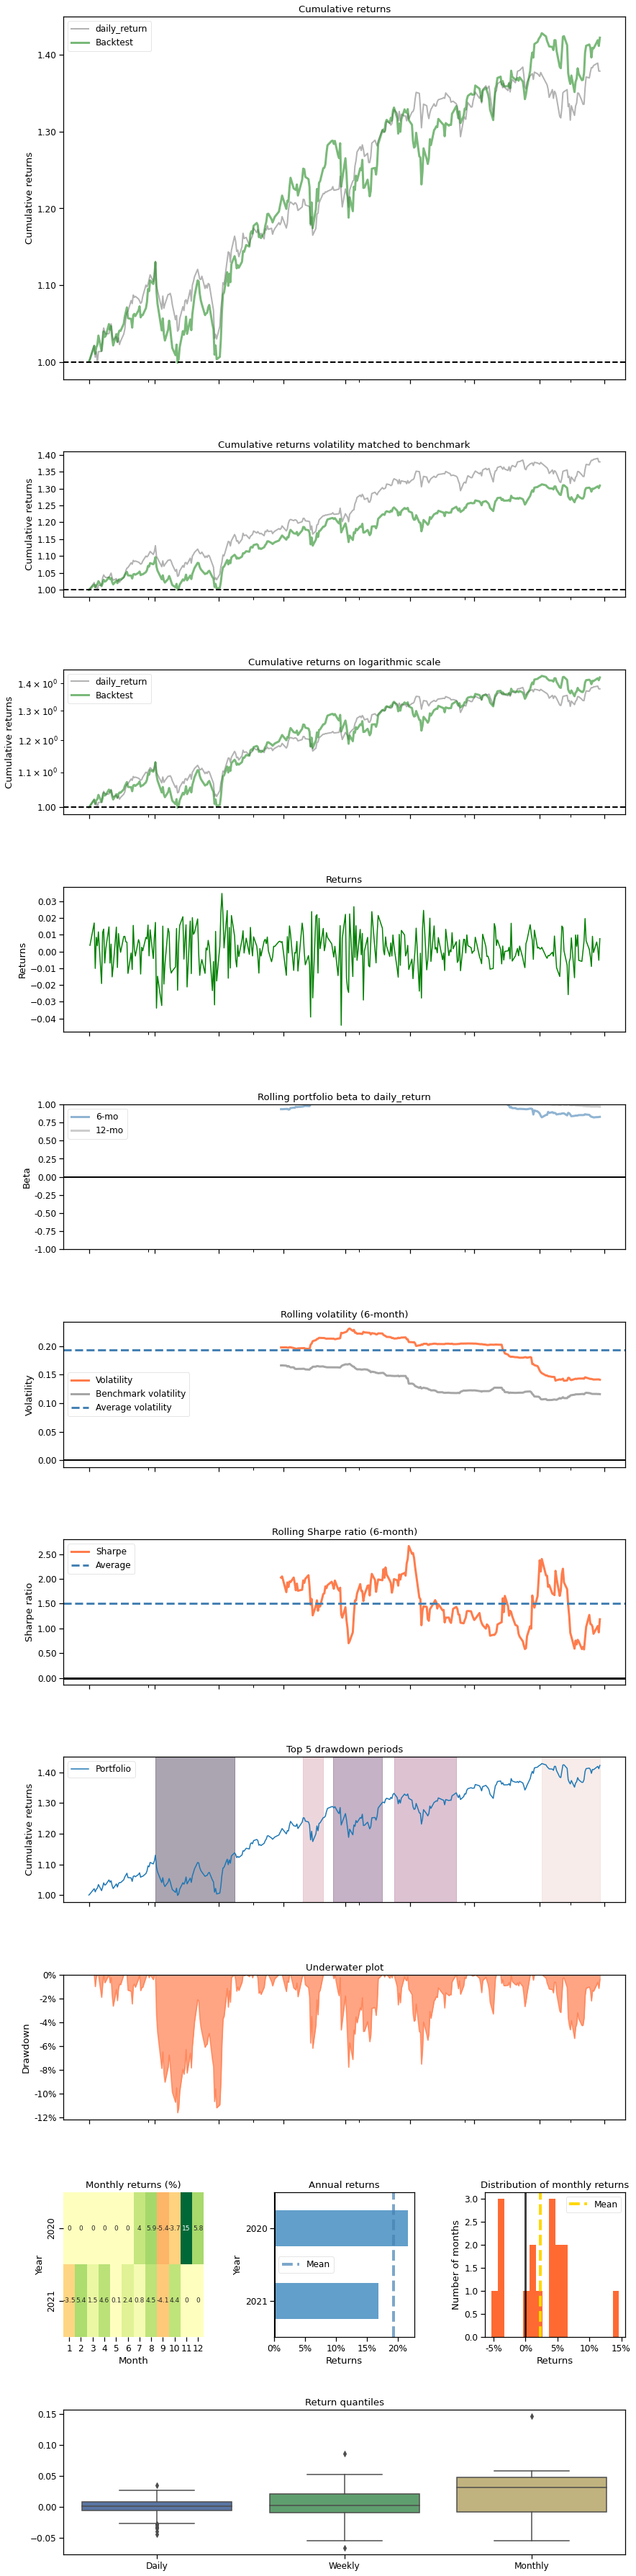

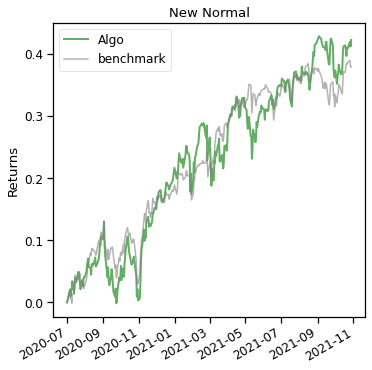

In [37]:
print("==============Compare to NDX===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI',
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])